In [35]:
from termcolor import colored
import numpy as np
from copy import deepcopy #https://stackoverflow.com/questions/15214404/how-can-i-copy-an-immutable-object-like-tuple-in-python
from queue import PriorityQueue #https://builtin.com/data-science/priority-queues-in-python
import heapq #https://builtin.com/data-science/priority-queues-in-python

class Problem:
    def __init__(self, initial_state):
        self.INITIAL_STATE = initial_state
        self.GOAL_STATE = ((1, 2, 3), (4, 5, 6), (7, 8, 0))

#returns where the empty "0" tile is
def get_index_zero(state):
    state = state
    for row in range(3):
        for col in range(3):
            if state[row][col] == 0:
                return (row, col)

def swap(state, index1, index2):
    new_state = []
    for row in state:
        new_state.append(list(row))
    temp = new_state[index1[0]][index1[1]]
    new_state[index1[0]][index1[1]] = new_state[index2[0]][index2[1]]
    new_state[index2[0]][index2[1]] = temp

    tuple_state = (tuple(new_state[0]), tuple(new_state[1]), tuple(new_state[2]))

    return tuple_state

def get_children(state):
    zero_index = get_index_zero(state)
    possible_moves = [(-1, 0), (1,0), (0, -1), (0, 1)]
    valid_states = []
    for move in possible_moves:
        new_row = zero_index[0] + move[0]
        new_col = zero_index[1] + move[1]

        if new_row >= 0 and new_row <=2 and new_col >=0 and new_col <=2:
            valid_states.append(swap(state, zero_index, (new_row, new_col)))

    return(valid_states)

def uniform_cost_search(problem):
    goal_state = problem.GOAL_STATE
    start_state = problem.INITIAL_STATE

    queue = PriorityQueue()
    queue.put((0, start_state, [], 0))
    max_queue_size = 1

    expanded = set()

    while not queue.empty():

        cost, curr_state, path, depth = queue.get()

        if curr_state == goal_state:
            return cost, curr_state, path, depth, len(expanded), max_queue_size

        if curr_state in expanded:
            continue

        expanded.add(curr_state)

        for new_state in get_children(curr_state):
            if new_state not in expanded:
                new_path = path[:]
                new_path.append(curr_state)
                new_depth = depth + 1
                heuristic = 0
                new_cost = new_depth
                queue.put((new_cost + heuristic, new_state, new_path, new_depth))
                max_queue_size = max(max_queue_size, queue.qsize())

    return None, None, None, None, None, None

def misplaced_tile(state, goal_state):
    num_misplaced_tiles = 0
    for i in range(3):
        for j in range(3):
            if goal_state[i][j] != 0:
                if state[i][j] != goal_state[i][j]:
                    num_misplaced_tiles += 1
    return num_misplaced_tiles

def astar_misplaced_tile(problem):
    goal_state = problem.GOAL_STATE
    start_state = problem.INITIAL_STATE

    queue = PriorityQueue()
    queue.put((0, start_state, [], 0))
    max_queue_size = 1

    expanded = set()

    while not queue.empty():

        cost, curr_state, path, depth = queue.get()

        if curr_state == goal_state:
            return cost, curr_state, path, depth, len(expanded), max_queue_size

        if curr_state in expanded:
            continue

        expanded.add(curr_state)

        for new_state in get_children(curr_state):
            if new_state not in expanded:
                new_path = path[:]
                new_path.append(curr_state)
                new_depth = depth + 1
                heuristic = misplaced_tile(new_state, goal_state)
                new_cost = new_depth
                queue.put((new_cost + heuristic, new_state, new_path, new_depth))
                max_queue_size = max(max_queue_size, queue.qsize())

    return None, None, None, None, None, None

def manhattan_distance(state, goal_state):
    total_distance = 0
    for num in range(1,9):
        state_index = (-1, -1)
        goal_index = (-1, -1)
        for i in range(3):
            for j in range(3):
                if state[i][j] == num:
                    state_index = (i, j)
                if goal_state[i][j] == num:
                    goal_index = (i, j)
        total_distance += abs(state_index[0] - goal_index[0]) + abs(state_index[1] - goal_index[1])
    return total_distance

def astar_manhattan(problem):
    goal_state = problem.GOAL_STATE
    start_state = problem.INITIAL_STATE

    queue = PriorityQueue()
    queue.put((0, start_state, [], 0))
    max_queue_size = 1

    expanded = set()

    while not queue.empty():

        cost, curr_state, path, depth = queue.get()

        if curr_state == goal_state:
            return cost, curr_state, path, depth, len(expanded), max_queue_size

        if curr_state in expanded:
            continue

        expanded.add(curr_state)

        for new_state in get_children(curr_state):
            if new_state not in expanded:
                new_path = path[:]
                new_path.append(curr_state)
                new_depth = depth + 1
                heuristic = manhattan_distance(new_state, goal_state)
                new_cost = new_depth
                queue.put((new_cost + heuristic, new_state, new_path, new_depth))
                max_queue_size = max(max_queue_size, queue.qsize())

    return None, None, None, None, None, None

In [36]:
#test cases as listed on slides https://www.dropbox.com/scl/fo/lucvvfzc0fi7zf3tdlvpx/AJFYrHAXs3fO1nj_OeFxwvc?dl=0&e=2&preview=Eight-Puzzle_briefing_and_review_of_search.pptx&rlkey=cpr5hsj0grbd3pueqm05iao21
test_cases = [
    {
        "name": "Expected to be solved at depth 0",
        "start": ((1, 2, 3), (4, 5, 6), (7, 8, 0))
    },
    {
        "name": "Expected to be solved at depth 2",
        "start": ((1, 2, 3), (4, 5, 6), (0, 7, 8))
    },
    {
        "name": "Expected to be solved at depth 4",
        "start": ((1, 2, 3), (5, 0, 6), (4, 7, 8))
    },
    {
        "name": "Expected to be solved at depth 8",
        "start": ((1, 3, 6), (5, 0, 2), (4, 7, 8))
    },
    {
        "name": "Expected to be solved at depth 12",
        "start": ((1, 3, 6), (5, 0, 7), (4, 8, 2))
    },
    {
        "name": "Expected to be solved at depth 16",
        "start": ((1, 6, 7), (5, 0, 3), (4, 8, 2))
    },
    {
        "name": "Expected to be solved at depth 20",
        "start": ((7, 1, 2), (4, 8, 5), (6, 3, 0))
    },
    {
        "name": "Expected to be solved at depth 24",
        "start": ((0, 7, 2), (4, 6, 1), (3, 5, 8))
    }
]

algorithms = {
    "Uniform Cost Search": uniform_cost_search,
    "A* with the Misplaced Tile heuristic": astar_misplaced_tile,
    "A* with the Manhattan Distance heuristic": astar_manhattan
}

In [37]:
uniform_cost_search_expanded = []
astar_misplaced_tile_expanded = []
astar_manhattan_expanded = []

uniform_cost_search_max = []
astar_misplaced_tile_max = []
astar_manhattan_max = []

solution_depth = [0,2,4,8,12,16,20,24]

In [38]:
for test in test_cases:
  prob = Problem(test["start"])
  cost, curr_state, path, depth, expanded, max_queue_size = uniform_cost_search(prob)
  uniform_cost_search_expanded.append(expanded)
  uniform_cost_search_max.append(max_queue_size)

for test in test_cases:
  prob = Problem(test["start"])
  cost, curr_state, path, depth, expanded, max_queue_size = astar_misplaced_tile(prob)
  astar_misplaced_tile_expanded.append(expanded)
  astar_misplaced_tile_max.append(max_queue_size)

for test in test_cases:
  prob = Problem(test["start"])
  cost, curr_state, path, depth, expanded, max_queue_size = astar_manhattan(prob)
  astar_manhattan_expanded.append(expanded)
  astar_manhattan_max.append(max_queue_size)

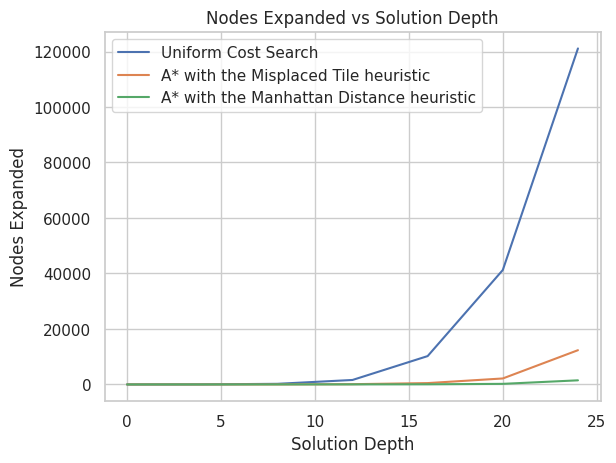

In [42]:
plt.plot(solution_depth, uniform_cost_search_expanded, label = "Uniform Cost Search")
plt.plot(solution_depth, astar_misplaced_tile_expanded, label = "A* with the Misplaced Tile heuristic")
plt.plot(solution_depth, astar_manhattan_expanded, label = "A* with the Manhattan Distance heuristic")
plt.title("Nodes Expanded vs Solution Depth")
plt.xlabel("Solution Depth")
plt.ylabel("Nodes Expanded")
plt.legend()
plt.show()

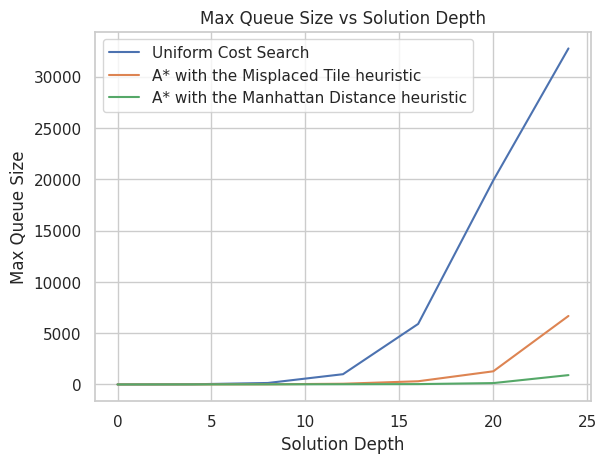

In [41]:
plt.plot(solution_depth, uniform_cost_search_max, label = "Uniform Cost Search")
plt.plot(solution_depth, astar_misplaced_tile_max, label = "A* with the Misplaced Tile heuristic")
plt.plot(solution_depth, astar_manhattan_max, label = "A* with the Manhattan Distance heuristic")
plt.title("Max Queue Size vs Solution Depth")
plt.xlabel("Solution Depth")
plt.ylabel("Max Queue Size")
plt.legend()
plt.show()